# Zoom on to the GOES-17 IR channel eruption subregion 

This jupyter notebook makes a sub-region plot based on the IR channel of GOES-17 satellite around the Tonga eruption site. Select the time you want to plot and a figure will be automatically save in your working directory.

If you use this in a scientific paper, we will appreciate a citation to the paper:

Omira, R., Ramalho, R.S., Kim, J., Gonzalez, P.J., Kadri, U., Miranda, J.M., Carrilho, F., Baptista, M.A., (2022) Global Tonga tsunami explained by a fast-moving atmospheric source. *Nature*, doi:[10.1038/s41586-022-04926-4](https://doi.org/10.1038/s41586-022-04926-4).

### Import the GOES package.

In [1]:
import GOES

### Set path and name of file that will be read. Important to change ``fechahora`` variable!

In [46]:
path = ''
fechahora='202201150520' # Modify this line with the date and time that you want to plot
file = 'OR_ABI-L2-CMIPF-M6C13_G17_s'+fechahora+'.nc'

ds = GOES.open_dataset(path+file)

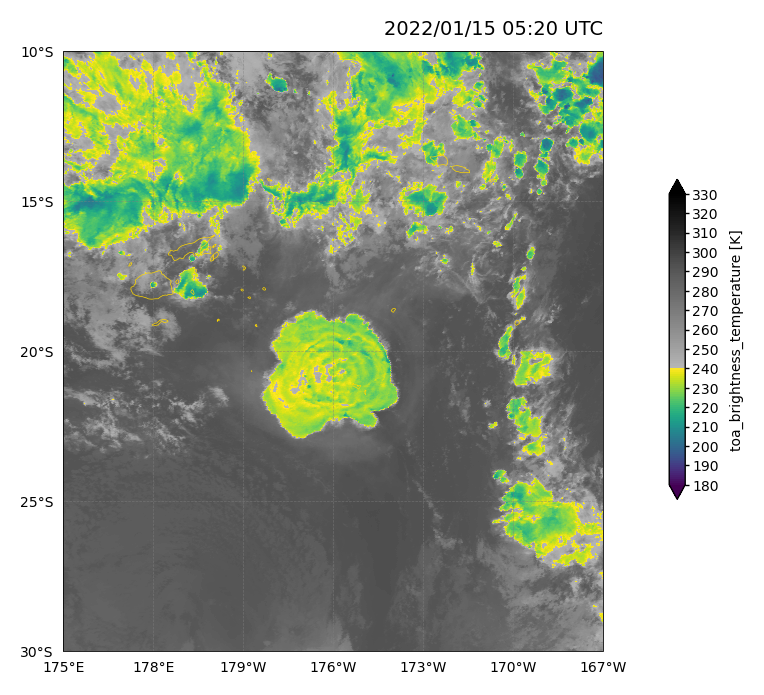

In [47]:
# Set the map domain. Gets image with the coordinates of corners of their pixels. Gets information about data.
domain = [-185.0,-167.0,-30.0,-10.0]
CMI, LonCor, LatCor = ds.image('CMI', lonlat='corner', domain=domain)
sat = ds.attribute('platform_ID')
band = ds.variable('band_id').data[0]
wl = ds.variable('band_wavelength').data[0]

# Creates a custom color palette using the [custom_color_palette](https://github.com/joaohenry23/custom_color_palette) package.
# import packages
import custom_color_palette as ccp
import matplotlib.pyplot as plt
# set the colors of the custom palette
#lower_colors = ['maroon','red','darkorange','#ffff00','forestgreen','cyan','royalblue',(148/255,0/255,211/255)]
#lower_colors = ['firebrick','khaki','white']
lower_colors = plt.cm.viridis
lower_palette = [lower_colors, ccp.range(180.0,240.0,1.0)]
upper_colors = plt.cm.Greys
upper_palette = [upper_colors, ccp.range(240.0,330.0,1.0), [ccp.range(180.0,330.0,1.0),240.0,330.0]]
# pass parameters to the creates_palette module
cmap, cmticks, norm, bounds = ccp.creates_palette([lower_palette, upper_palette], extend='both')
# creating colorbar labels
ticks = ccp.range(180,330,10)


# Create the map
# import packages
import numpy as np
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=ccrs.PlateCarree(lon_cen))
ax.outline_patch.set_linewidth(0.3)

# add the geographic boundaries
l = NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(l, edgecolor='gold', linewidth=0.25)

# plot the data
img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
#img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=plt.cm.Greys, norm=norm, transform=ccrs.PlateCarree())

# add the colorbar
cb = plt.colorbar(img, ticks=ticks, orientation='vertical', extend='both',
                  cax=fig.add_axes([0.92, 0.35, 0.02, 0.40]))
cb.ax.tick_params(labelsize=5, labelcolor='black', width=0.5, length=1.5, direction='out', pad=1.0)
cb.set_label(label='{} [{}]'.format(CMI.standard_name, CMI.units), size=5, color='black', weight='normal')
cb.outline.set_linewidth(0.5)

# set the title
#ax.set_title('{} - C{:02d} [{:.1f} μm]'.format(sat,band, wl), fontsize=7, loc='left')
ax.set_title(CMI.time_bounds.data[0].strftime('%Y/%m/%d %H:%M UTC'), fontsize=7, loc='right')

# Sets X axis characteristics
dx = 3
xticks = np.arange(domain[0], domain[1]+dx, dx)
xticks = np.where(xticks<-180.0,xticks+360.0,xticks)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(dateline_direction_label=True))
#ax.set_xlabel('Longitude', color='black', fontsize=7, labelpad=3.0)

# Sets Y axis characteristics
dy = 5
yticks = np.arange(domain[2], domain[3]+dy, dy)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
#ax.set_ylabel('Latitude', color='black', fontsize=7, labelpad=3.0)

# Sets tick characteristics
ax.tick_params(left=True, right=True, bottom=True, top=True,
               labelleft=True, labelright=False, labelbottom=True, labeltop=False,
               length=0.0, width=0.05, labelsize=5.0, labelcolor='black')

# Sets grid characteristics
ax.gridlines(xlocs=xticks, ylocs=yticks, alpha=0.6, color='gray',
             draw_labels=False, linewidth=0.25, linestyle='--')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]], crs=ccrs.PlateCarree())



# Save the image
plt.savefig('Image_G17_'+fechahora+'.png',transparent=False)
# Show the image
plt.show()